<h3>Hypothesis Testing - Birth Dataset</h3>

In this analysis, we will be exploring a dataset called Birth that contains data about the weight
of babies at birth and other variables that may have an effect on these weights.

The dataset consists of 10 variables (Weight, Black, Married, Boy, MomAge, MomSmoke,
CigsPerDay, MomWtGain, Visit, MomEdLevel) as well as 50,000 records (rows).

| Variable  | Description | Type | Unit |
| --------- | --------- | --------- | --------- |
| Weight    | Weight of infant at birth | Numeric Discrete | Grams          |
| Black     | If the mother is black | Character Nominal | 1=True 0=False |
| Married   | If the mother is married | Character Nominal | 1=True 0=False |
| Boy       | If the baby is boy | Character Nominal | 1=True 0=False |
| MomAge    | Mother’s Age - Values Unclear | Numeric Discrete |
| MomSmoke  | If the mother smokes | Character Nominal | 1=True 0=False |
| CigsPerDay| Number of cigarettes per day if she smokes | Numeric Discrete |
| MomWtGain | Weight gained by the mother during pregnancy | Numeric Discrete | Grams
| Visit     | Number of parental visits | Numeric Discrete |
| MomEdLevel| Education level of the mother | Character Ordinal | 0=No Education 1=High School 2=Undergraduate 3=Graduate |

In [9]:
libname project "~";
filename reffile 'File BIRTH.xlsx';
proc import
	datafile=reffile
	out=project.birth_weight
	dbms=XLSX
	replace;
	getnames=YES;
run;

proc print 	data=project.birth_weight (obs=5); run;

Obs,Weight,Black,Married,Boy,MomAge,MomSmoke,CigsPerDay,MomWtGain,Visit,MomEdLevel
1,4111,0,1,1,-3,0,0,-16,1,0
2,3997,0,1,0,1,0,0,2,3,2
3,3572,0,1,1,0,0,0,-3,3,0
4,1956,0,1,1,-1,0,0,-5,3,2
5,3515,0,1,1,-6,0,0,-20,3,0


First, let’s have a look at the weight variable, the graph below shows that the data is distributed
close to a normal distribution. Where the mean for new born babies is 3370.8 grams, Standard
deviation is 566.4, the data ranges between 240 grams and 6350 grams. And finally 50% of the data are
between 3062 grams and 3720 grams.


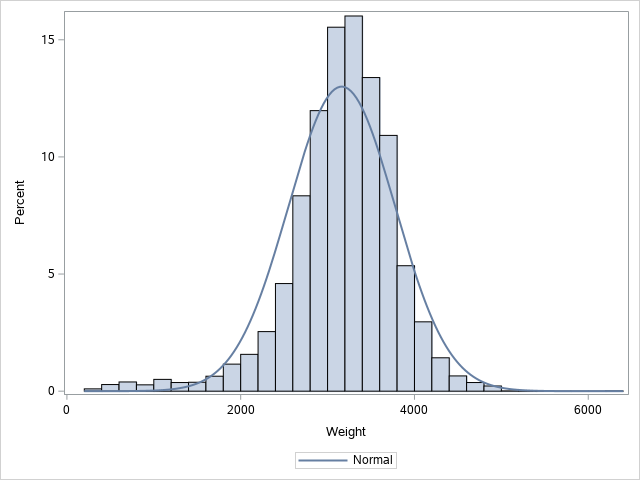

In [10]:
proc sgplot data=project.birth_weight; 
  histogram weight;
  density weight;
  where black = 1;
run;

In [16]:
proc means 	data=project.birth_weight
	mean median mode min max range q1 q3 std
	maxdec=1;
	variable weight;
run;

<h3>Black Mother Variable</h3>

When the data is separated into two samples, one for babies who have black mothers and the
other for babies who don’t then the data is split into 41,858 and 8142 records respectively. Both
of them follow a normal distribution.


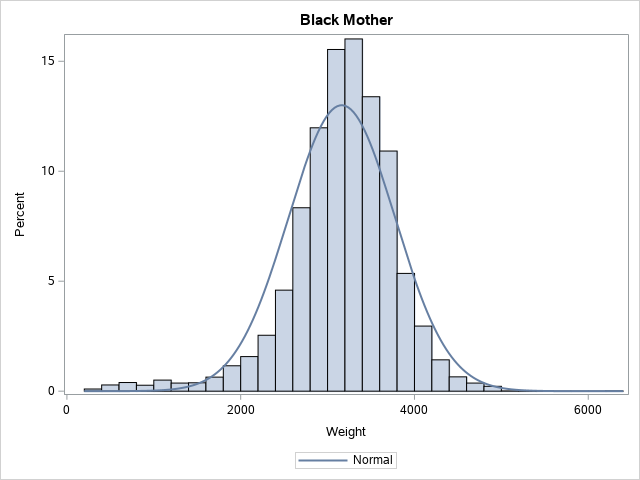

In [17]:
title 'Black Mother';
proc means data=project.birth_weight maxdec=1;
VAR weight;
where black = 1;
run;
proc sgplot data=project.birth_weight; 
  histogram weight;
  density weight;
  where black = 1;
run;


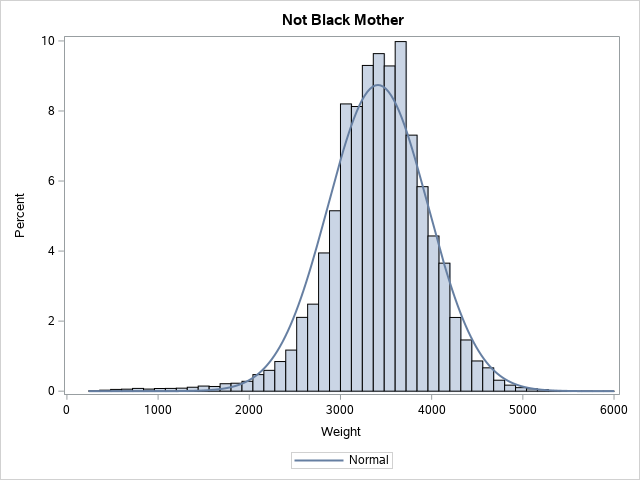

In [18]:
title 'Not Black Mother';
proc means data=project.birth_weight maxdec=1;
var weight;
where black = 0;
run;
proc sgplot data=project.birth_weight; 
  histogram weight;
  density weight;
  where black = 0;
run;

The weight mean for babies with black mothers is 3162.7 grams and the standard deviation is
613.7 while the weight mean for babies with non black mothers is 3411.2 grams and the
standard deviation is 547.6. From these numbers, the null hypothesis would be that there is no
difference in babies weight whether their mother is black or not.

H0: μ Black Mother - μ Non Black Mother = 0

H1: μ Black Mother - μ Non Black Mother ≠ 0


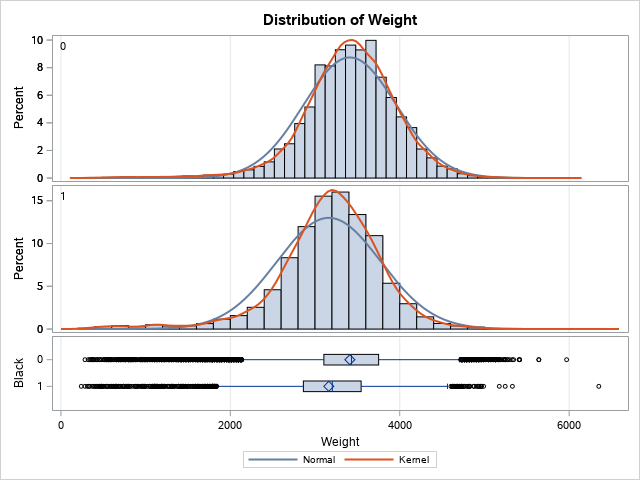
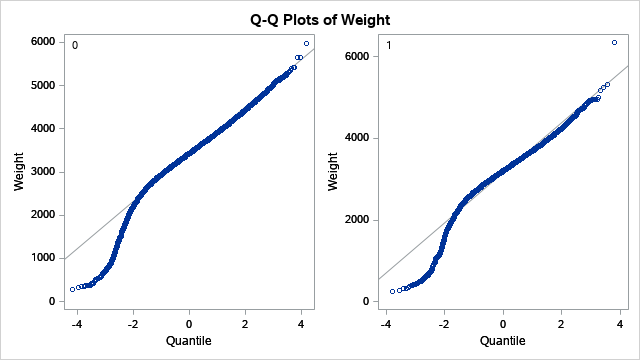

In [20]:
proc ttest
	data=project.birth_weight;
	class black;
	var weight;
run;

Since the data split into two independent two
samples, I have used the SAS t-test procedure with
95% confidence level. and it turns out that both
data sets have unequal variances ( p < 0.0001
which is lower than ɑ ).

Therefor, I picked the Satterthwaite method and
from it we realize that the t value is 34.01 and the p
value is <.0001 which is less than ɑ so we reject
the null hypothesis

The difference between the means of babies with black and non black mothers is 248.6 grams
for the dataset. We are 95% confident that babies with black mothers have different weight
mean than the babies with non black mothers within the confidence interval of 234.2 grams and
262.9 grams for any samples taken.

<h3>Married Variable</h3>

For whether the mother was married or not, the data is distributed into two samples, the first one
Married Mothers have 35,631 records, a mean of 3425.7 grams and standard deviation of 551.8

In [21]:
title 'Married Mother';
proc means data=project.birth_weight maxdec=1;
VAR weight;
where married = 1;
run;

Unmarried mothers have 14,369 records, a mean of 3234.4 grams and a standard deviation of 579.

In [22]:
title 'Not Married Mother';
proc means data=project.birth_weight maxdec=1;
var weight;
where married = 0;
run;

In order to determine whether the mean weight of married mothers is the same as the mean of weight for
unmarried mothers we test the following hypothesis using the same two tail t-test as before.

H0: μ Married Mother - μ Unmarried Mother = 0

H1: μ Married Mother - μ Unmarried Mother ≠ 0


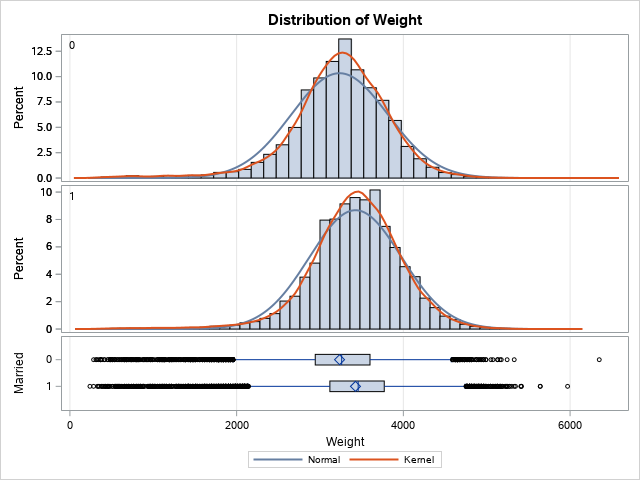
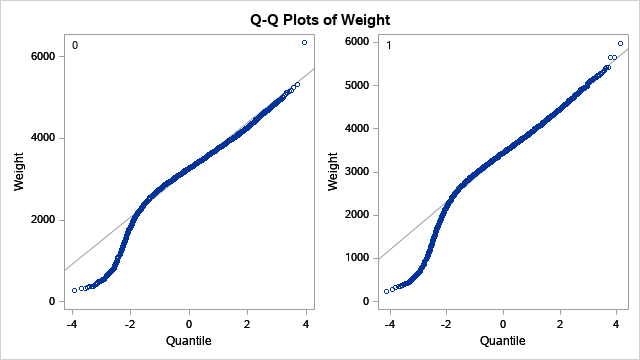

In [23]:
proc ttest
	data=project.birth_weight;
	class married;
	var weight;
run;

The Sas proc ttest returns that both samples have
unequal variance ( p < 0.0001 which is lower than ɑ
) and therefore we choose the Satterthwaite
method.

The t Value for unequal variance is -33.88 and p
Value is <.0001 thus we reject the null hypothesis
and assume with 95% confidence that being
married has a significant effect on the weight of
newborn babies.

The difference between the means of babies with Married and unmarried mothers is -191.3
grams for the dataset. We are 95% confident that babies with Married mothers have different
weight mean than the babies with unmarried mothers within the confidence interval of -202.1
grams and -180.4 grams for any samples taken.

<h3>Boy Variable</h3>

Babies born as boys had 25,792 records, a mean of 3,427.3 grams and a standard deviation of
577.7


In [25]:
title 'Boy';
proc means data=project.birth_weight maxdec=1;
VAR weight;
where boy = 1;
run;

While babies born as girls had 24,208 records, a mean of 3310.6 grams and a standard
deviation of 547.7

In [26]:
title 'Not a Boy';
proc means data=project.birth_weight maxdec=1;
var weight;
where boy = 0;
run;

In order to determine whether the mean weight for boys is the same as the mean of weight for girls we
test the following hypothesis using the same two tail t-test as before.

H0: μ Boys - μ Girls = 0

H1: μ Boys - μ Girls ≠ 0



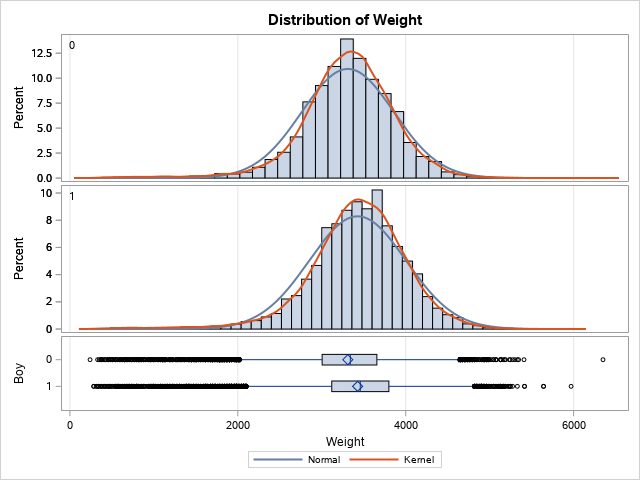
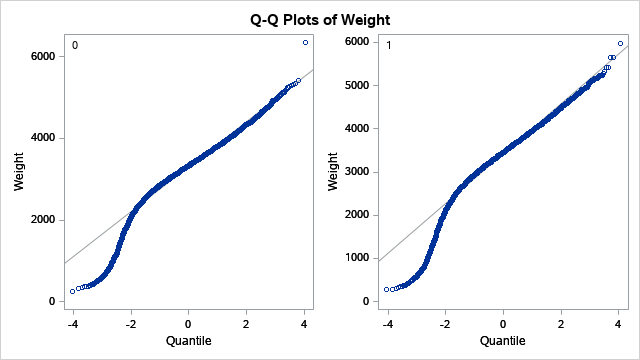

In [27]:
proc ttest
	data=project.birth_weight h0=0 side=l;
	class boy;
	var weight;
run;

The Sas proc ttest returns that both samples have
unequal variance and therefore we choose the
Satterthwaite method ( p < 0.0001 which is lower
than ɑ ).

The t Value for unequal variance is -23.18 and p
Value is <.0001 thus we reject the null hypothesis
and assume with 95% confidence that being
married has a significant effect on the weight of
newborn babies.


The difference between the means of babies that are boys and girls is -116.7 grams for the
dataset. We are 95% confident that babies that are boys have different weight mean than the
babies who are girls within the confidence interval of -126.6 grams and -106.8 grams for any
samples taken.

<h3>Is the difference in weight mean for boys higher than for girls?</h3>

To answer this question we need to make the following hypothesis and test it using a lower
sided t-test.

H0 : μ Boys - μNot Boys = 0

H1 : μ Boys - μ Not Boys > 0

The Sas proc ttest returns that both samples have
unequal variance and therefore we choose the
Satterthwaite method ( p < 0.0001 which is lower
than ɑ ).

The t Value for unequal variance is -23.18 and p
Value is <.0001 thus we reject the null hypothesis
and assume with 95% confidence that the weight of
boys at birth have a higher weight mean than girls
height mean at birth.


The difference between the means of babies that are boys and girls is -116.7 grams for the
dataset. We are 95% confident that babies who are boys have different weight mean than the
babies who are girls within the confidence interval of -Infty grams to -106.8 grams for any
samples taken.

<h3>MomSmoke Variable</h3>

For whether the mother is a smoker or not the data is separated into two sets. 6,533 records for
babies with smoking mothers, 3160.9 grams for the mean and a standard deviation of 576.8.

In [28]:
title 'Smoker';
proc means data=project.birth_weight maxdec=1;
VAR weight;
where MomSmoke = 1;
run;

43,467 records are for babies with Non Smoking mothers, a mean of 3402.3 grams and a standard
deviation of 558

In [29]:
title 'Non Smoker';
proc means data=project.birth_weight maxdec=1;
var weight;
where MomSmoke = 0;
run;

In order to determine whether the mean weight of Smoking mothers is the same as the mean of weight for
Non Smoking mothers we test the following hypothesis using the same two tail t-test as before.

H0: μ Smoking Mother - μ Non Smoking Mother = 0

H1: μ Smoking Mother - μ Non Smoking Mother ≠ 0



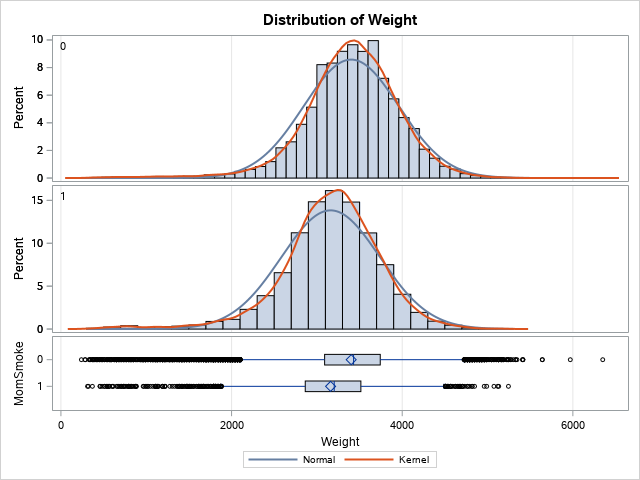
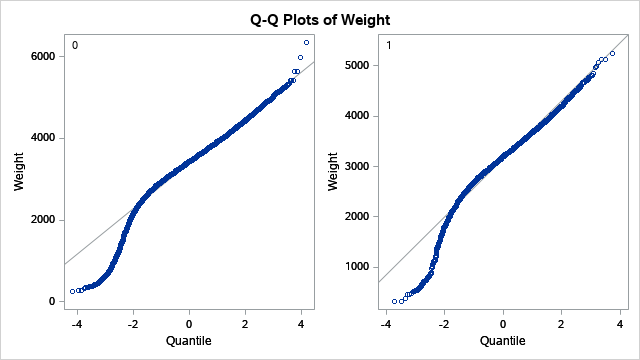

In [30]:
proc ttest
	data=project.birth_weight;
	class MomSmoke;
	var weight;
run;

The Sas proc ttest returns that both samples have
unequal variance ( p < 0.0004 which is lower than ɑ
) is lower than a and therefore we choose the
Satterthwaite method.

The t Value for unequal variance is 31.68 and p
Value is <.0001 thus we reject the null hypothesis
and assume with 95% confidence that being
married has a significant effect on the weight of
newborn babies.

The difference between the means of babies with Smoking and Non Smoking mothers is 241.5
grams for the dataset. We are 95% confident that babies with Smoking mothers have different
weight mean than the babies with Non Smoking mothers within the confidence interval of 226.5
grams and 256.4 grams for any samples taken.